In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/US_Regional_Sales_Data.csv')

In [ ]:
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.08,"$1,001.18","$1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/2018,USD,14,20,196,27,3,0.08,"$3,348.66","$3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/2018,USD,21,16,213,16,1,0.05,$781.22,"$1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/2018,7/6/2018,USD,28,48,107,23,8,0.08,"$1,464.69","$2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/2018,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.10,"$1,476.14","$1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/2021,14/1/21,USD,9,41,339,29,1,0.08,$121.94,$234.50
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/2021,4/1/2021,USD,14,29,202,3,6,0.05,"$1,921.56","$3,202.60"
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.20,"$2,792.76","$3,825.70"
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.10,$804.00,"$1,072.00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [ ]:
# Define a custom function to convert the date format
def convert_to_datetime(date_str):
    try:
        return pd.to_datetime(date_str,  format='%d/%m/%y')
    except:
        return pd.to_datetime(date_str,  format='%d/%m/%Y')


# Apply the custom function to the 'date_col' using apply
df['ProcuredDate'] = df['ProcuredDate'].apply(convert_to_datetime)
df['OrderDate'] = df['OrderDate'].apply(convert_to_datetime)
df['ShipDate'] = df['ShipDate'].apply(convert_to_datetime)
df['DeliveryDate'] = df['DeliveryDate'].apply(convert_to_datetime)

In [ ]:
df['CustomerID']= df['_CustomerID']
df['SalesTeamID']=df['_SalesTeamID']
df['StoreID']=df['_StoreID']
df['ProductID']=df['_ProductID']

In [ ]:
df=df.drop('_CustomerID', axis =1)

In [ ]:
df=df.drop('_SalesTeamID',axis=1)
df=df.drop('_StoreID',axis=1)
df=df.drop('_ProductID',axis=1)

In [ ]:
df=df.drop('CurrencyCode', axis=1)

In [ ]:
arrange=['OrderNumber','Sales Channel','WarehouseCode','ProcuredDate','OrderDate','ShipDate','DeliveryDate','SalesTeamID','CustomerID','StoreID','ProductID','Order Quantity','Discount Applied','Unit Cost','Unit Price']

In [ ]:
df=df[arrange]

In [ ]:
df['Unit Cost']=df['Unit Cost'].str.replace('$','').str.replace(',','').astype(float)

<ipython-input-37-3729f0ee3f5e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Unit Cost']=df['Unit Cost'].str.replace('$','').str.replace(',','').astype(float)


In [ ]:
df['Unit Price']=df['Unit Price'].str.replace('$','').str.replace(',','').astype(float)

<ipython-input-38-e6b23ad87623>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Unit Price']=df['Unit Price'].str.replace('$','').str.replace(',','').astype(float)


In [ ]:
df['Revenue'] = df['Unit Price']*(1-df['Discount Applied'])*df['Order Quantity'].round(2)
df['Profit'] = (df['Revenue'] - df['Unit Cost']*df['Order Quantity']).round(2)

In [ ]:
df['Procured_to_Order'] = (df['OrderDate']-df['ProcuredDate']).dt.days
df['Order_to_Ship'] = (df['ShipDate']-df['OrderDate']).dt.days
df['Ship_to_Delivery'] = (df['DeliveryDate']-df['ShipDate']).dt.days
df['Procured_to_Delivery'] = (df['DeliveryDate']-df['ProcuredDate']).dt.days

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OrderNumber           7991 non-null   object        
 1   Sales Channel         7991 non-null   object        
 2   WarehouseCode         7991 non-null   object        
 3   ProcuredDate          7991 non-null   datetime64[ns]
 4   OrderDate             7991 non-null   datetime64[ns]
 5   ShipDate              7991 non-null   datetime64[ns]
 6   DeliveryDate          7991 non-null   datetime64[ns]
 7   SalesTeamID           7991 non-null   int64         
 8   CustomerID            7991 non-null   int64         
 9   StoreID               7991 non-null   int64         
 10  ProductID             7991 non-null   int64         
 11  Order Quantity        7991 non-null   int64         
 12  Discount Applied      7991 non-null   float64       
 13  Unit Cost         

In [ ]:
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,SalesTeamID,CustomerID,StoreID,...,Order Quantity,Discount Applied,Unit Cost,Unit Price,Revenue,Profit,Procured_to_Order,Order_to_Ship,Ship_to_Delivery,Procured_to_Delivery
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,...,5,0.08,1001.18,1963.1,9030.260,4024.36,151,14,5,170
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,14,20,196,...,3,0.08,3348.66,3939.6,10873.296,827.32,151,22,10,183
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,21,16,213,...,1,0.05,781.22,1775.5,1686.725,905.50,151,21,10,182
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,28,48,107,...,8,0.08,1464.69,2324.9,17111.264,5393.74,151,2,5,158
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,22,49,111,...,8,0.10,1476.14,1822.4,13121.280,1312.16,51,16,10,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-09-26,2020-12-30,2021-01-07,2021-01-14,9,41,339,...,1,0.08,121.94,234.5,215.740,93.80,95,8,7,110
7987,SO - 0008088,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-02,2021-01-04,14,29,202,...,6,0.05,1921.56,3202.6,18254.820,6725.46,95,3,2,100
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,14,32,241,...,5,0.20,2792.76,3825.7,15302.800,1339.00,95,24,3,122
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,20,42,112,...,8,0.10,804.00,1072.0,7718.400,1286.40,95,21,5,121


In [ ]:
file = df.to_csv('US_Regional_Sales_Cleaned_Data.csv', encoding='utf-8')

In [ ]:
df.describe()

,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Revenue,Profit,Procured_to_Order,Order_to_Ship,Ship_to_Delivery,Procured_to_Delivery
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.115649,1431.911513,2284.536504,9139.855365,2655.301465,109.243149,15.168940,5.503942,129.916031
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085018,1112.413063,1673.096364,8906.304302,3403.115126,34.371490,7.793951,2.855809,35.297567
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,68.680000,167.500000,100.500000,-12167.200000,31.000000,2.000000,1.000000,40.000000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,606.120000,1031.800000,2808.874500,495.280000,83.000000,8.000000,3.000000,103.000000
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.080000,1080.580000,1849.200000,6116.430000,1536.430000,108.000000,15.000000,5.000000,129.000000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,2040.250000,3611.300000,12801.690000,3502.830000,135.000000,22.000000,8.000000,156.000000
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,5498.560000,6566.000000,49697.920000,26384.600000,189.000000,28.000000,10.000000,219.000000


In [ ]:
df['Sales Channel'].value_counts()

In-Store       3298
Online         2425
Distributor    1375
Wholesale       893
Name: Sales Channel, dtype: int64

In [ ]:
mapping_Sales = { 'In-Store':1 , 'Online':2 , 'Distributor':3 , 'Wholesale':4 }
df['Sales Channel'] = df['Sales Channel'].replace(mapping_Sales)

In [ ]:
df.corr()

<ipython-input-47-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales Channel,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Revenue,Profit,Procured_to_Order,Order_to_Ship,Ship_to_Delivery,Procured_to_Delivery
Sales Channel,1.000000,0.929128,-0.002337,-0.002816,0.004224,0.012200,-0.003357,0.002596,0.005264,0.009178,0.014439,-0.014612,0.000303,0.013162,-0.013096
SalesTeamID,0.929128,1.000000,-0.006335,-0.014791,0.001269,0.009241,-0.004381,0.004416,0.007223,0.008145,0.012882,-0.013830,0.007014,0.015428,-0.010670
CustomerID,-0.002337,-0.006335,1.000000,-0.003684,0.004227,-0.015140,0.002919,0.003661,0.003349,-0.007141,-0.013262,-0.003918,0.001203,-0.012454,-0.004557
StoreID,-0.002816,-0.014791,-0.003684,1.000000,-0.005283,-0.001096,-0.005296,-0.003566,0.001223,0.006971,0.011829,-0.007022,-0.004682,-0.004798,-0.008260
ProductID,0.004224,0.001269,0.004227,-0.005283,1.000000,0.006514,-0.005198,-0.004121,-0.011943,-0.008462,-0.018817,-0.004146,-0.007569,0.004786,-0.005321
Order Quantity,0.012200,0.009241,-0.015140,-0.001096,0.006514,1.000000,-0.007463,0.001814,0.002566,0.523204,0.400207,-0.004733,-0.007098,0.001392,-0.006063
Discount Applied,-0.003357,-0.004381,0.002919,-0.005296,-0.005198,-0.007463,1.000000,0.012432,0.014752,-0.090309,-0.253756,0.002988,-0.029986,-0.004844,-0.004104
Unit Cost,0.002596,0.004416,0.003661,-0.003566,-0.004121,0.001814,0.012432,1.000000,0.942167,0.710585,0.369226,0.007494,-0.001065,-0.011583,0.006125
Unit Price,0.005264,0.007223,0.003349,0.001223,-0.011943,0.002566,0.014752,0.942167,1.000000,0.751977,0.565089,0.002269,-0.004675,-0.013220,0.000108
Revenue,0.009178,0.008145,-0.007141,0.006971,-0.008462,0.523204,-0.090309,0.710585,0.751977,1.000000,0.790461,0.004507,-0.005418,0.002064,0.003360


<ipython-input-48-f27a9d3095de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,center=0)


<Axes: >

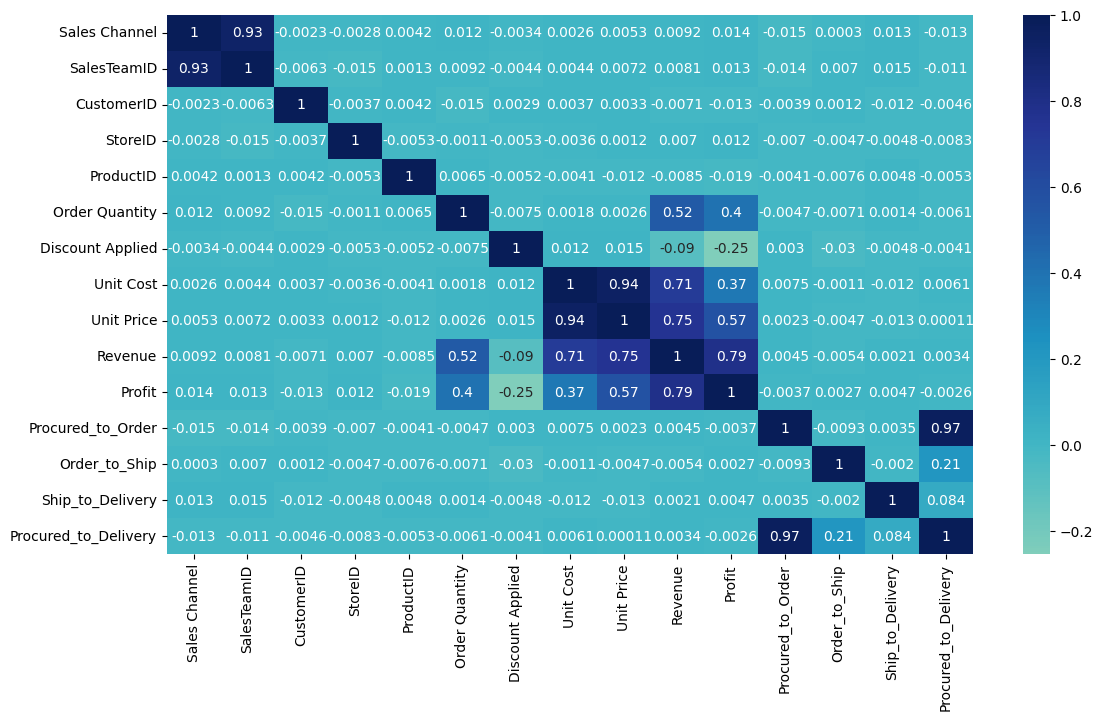

In [ ]:
plt.figure(figsize = (13,7))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,center=0)

In [ ]:
df['Revenue'].sum()

73036584.224

In [ ]:
df['Profit'].sum()

21218514.009999998